In [103]:
import pandas as pd
import seaborn as sns

data_train_path = "../data/raw/train.csv"


data_train = pd.read_csv(filepath_or_buffer=data_train_path)

In [104]:
sns.set_theme(style="darkgrid")

## Relación entre cada atributo y el objetivo


### Cantidad de sobrevivientes por clase


In [105]:
data_survivors_by_class = (
    data_train.copy()
    .loc[:, ["PassengerId", "Survived", "Pclass"]]
    .replace(
        to_replace={
            "Survived": {0: "No", 1: "Si"},
            "Pclass": {1: "Primera", 2: "Segunda", 3: "Tercera"},
        }
    )
    .rename(
        columns={
            "Pclass": "Clase",
            "Survived": "Sobreviviente",
            "PassengerId": "Cantidad",
        }
    )
    .groupby(by=["Clase", "Sobreviviente"])
    .agg(func={"Cantidad": "count"})
    .reset_index()
)


data_survivors_by_class

,Clase,Sobreviviente,Cantidad
0,Primera,No,80
1,Primera,Si,136
2,Segunda,No,97
3,Segunda,Si,87
4,Tercera,No,372
5,Tercera,Si,119


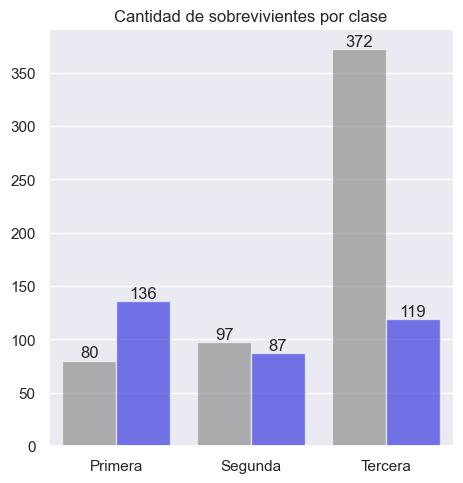

In [127]:
graph_survivors_by_class = (
    sns.catplot(
        data=data_survivors_by_class,
        x="Clase",
        y="Cantidad",
        hue="Sobreviviente",
        kind="bar",
        alpha=0.6,
        legend_out=False,
        palette=['grey', 'blue'],
    )
    .set_axis_labels(x_var="", y_var="")
    .set(title="Cantidad de sobrevivientes por clase")
)

ax_graph_survivors_by_class = graph_survivors_by_class.ax
ax_graph_survivors_by_class.get_legend().remove()

for container in ax_graph_survivors_by_class.containers:
    ax_graph_survivors_by_class.bar_label(container=container)  # type: ignore

### Cantidad de sobrevivientes por sexo


In [128]:
data_survivors_by_sex = (
    data_train.copy()
    .loc[:, ["Sex", "Survived", "PassengerId"]]
    .rename(
        columns={
            "Sex": "Genero",
            "Survived": "Sobreviviente",
            "PassengerId": "Cantidad",
        }
    )
    .replace(
        to_replace={
            "Genero": {"female": "mujer", "male": "hombre"},
            "Sobreviviente": {0: "No", 1: "Si"},
        }
    )
    .groupby(by=["Genero", "Sobreviviente"])
    .agg(func={"Cantidad": "count"})
    .reset_index()
)
data_survivors_by_sex

,Genero,Sobreviviente,Cantidad
0,hombre,No,468
1,hombre,Si,109
2,mujer,No,81
3,mujer,Si,233


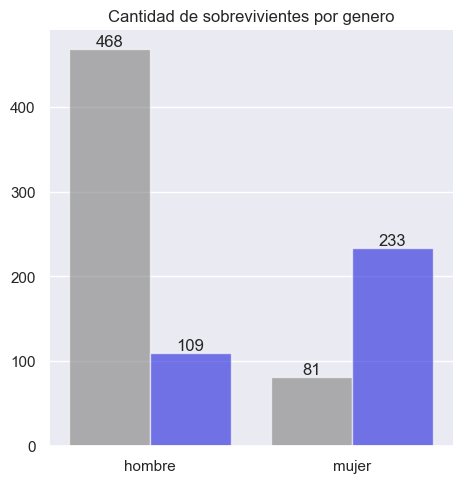

In [129]:
graph_survivors_by_gender = (
    sns.catplot(
        data=data_survivors_by_sex,
        x="Genero",
        y="Cantidad",
        hue="Sobreviviente",
        kind="bar",
        alpha=0.6,
        legend_out=False,
        palette=['grey', 'blue']
    )
    .set(title="Cantidad de sobrevivientes por genero")
    .set_axis_labels(x_var="", y_var="")
)

ax_graph_survivors_by_gender = graph_survivors_by_gender.ax
ax_graph_survivors_by_gender.get_legend().remove()

for container in ax_graph_survivors_by_gender.containers:
    ax_graph_survivors_by_gender.bar_label(container=container)  # type: ignore